# Project: Investigate a Dataset Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this project I will analyze the "No-show appointment" dataset which is provided in Kaggle. This dataset conaints around 100 thousand appointment information in Brazil. We will analyze this dataset to study the reasons of show up the appointments.<br>
>There is a 14 characterstics:
<br>Gender: m => male, f => female
<br>scheduled_day: which represents the day the patient set up their appointment
<br>appointment_day: which represent the day of the appointment
<br>scolarship: indicates wether or not the patient is enrolled in a Brasilian welfare program called Bolsa Familia, amongh other criteria to describe each patient
<br>handicap: True or False
<br>SMS_received: number of messages sent to the patient
<br>no_show "No" indicates if the patient showed up to their appointment and "Yes" if they didn't show up
<br>age: age of the patient

>In this dataset we will try to answer these questions:
<br>-Does the time betweeen setting up the appointment and appointment day affect showing up the appointment?
<br>-Does have a scholarship affect showing up the appointment?
<br>-Does send SMS-message affect showing up the appointment? 
<br>-Does the age affect showing up the appointment?
<br>-Does have a Handicap affect showing up the appointment?

In [49]:
#Import and load data
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [50]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### taking a look of some calculations

In [51]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### some information before cleaning

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


We can see that there is no missing values

### cheking of out of bound values

In [53]:
df.query('Age < 0').count()

PatientId         1
AppointmentID     1
Gender            1
ScheduledDay      1
AppointmentDay    1
Age               1
Neighbourhood     1
Scholarship       1
Hipertension      1
Diabetes          1
Alcoholism        1
Handcap           1
SMS_received      1
No-show           1
dtype: int64

There is a minus value I will delete it

### General information

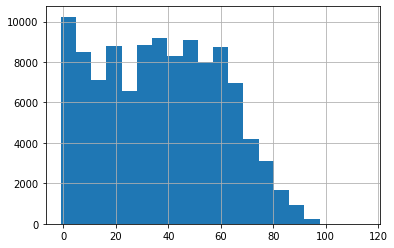

In [54]:
df['Age'].hist(bins=20);

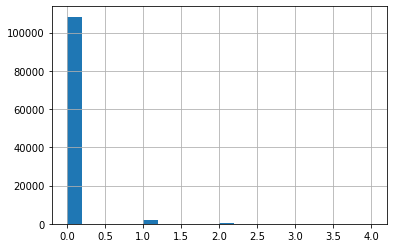

In [55]:
df['Handcap'].hist(bins=20);

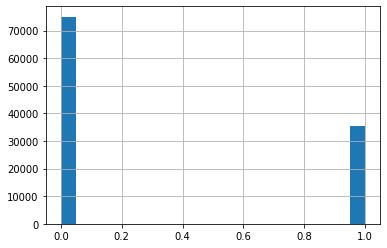

In [56]:
df['SMS_received'].hist(bins=20);

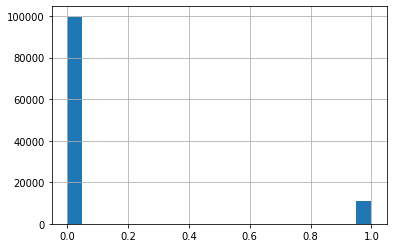

In [57]:
df['Scholarship'].hist(bins=20);

As we see most of the patients:

Are younger than 60 years old
<br>Aren't in the Bolsa familia program (scholarship)
<br>Are not handicap
<br>Doesn't received a reminder SMS

### Data Cleaning (Dropping no needed columns, modifying names of columns, correcting datatypes, dropping some rows)

In [58]:
# dropping some columns I don't need it
df.drop(['PatientId', 'AppointmentID', 'Neighbourhood', 'Hipertension', 'Diabetes', 'Alcoholism', 'Gender'], axis=1, inplace=True)

In [59]:
# modifying coloumns names to lower case to make rembering the name easier and use less memory
df.rename(columns={'Age': 'age', 
                   'Scholarship': 'scholarship', 
                   'Handcap': 'handicap',
                   'No-show': 'no_show',
                   'ScheduledDay': 'scheduled_day', 
                   'AppointmentDay': 'appointment_day'
                  }, inplace=True)

In [60]:
# discarding the ages bellow zero
df = df.query('age >= 0')

In [61]:
# formatting the 'no_show' column with 0's and 1's
df.no_show = df.no_show.map({ 'No': 0, 'Yes': 1 })

df.head(10)

,scheduled_day,appointment_day,age,scholarship,handicap,SMS_received,no_show
0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,0,0,0
1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0
2,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0
3,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0
4,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,0,0,0
5,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,0,0,0,0
6,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,0,0,0,1
7,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,0,0,0,1
8,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,0,0,0,0
9,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,0,0,0,0


In [62]:
# change the type of columns
def to_date(date):
   df[date] = pd.to_datetime(df[date])
    
def to_bool(column):
   df[column] = df[column].astype('bool')
    
to_date('scheduled_day')
to_date('appointment_day')
to_bool('scholarship')
to_bool('handicap')
to_bool('SMS_received')
to_bool('no_show')

In [63]:
# take a look for new changes
df.head(10)

,scheduled_day,appointment_day,age,scholarship,handicap,SMS_received,no_show
0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,False,False,False,False
1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,False,False,False,False
2,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,False,False,False,False
3,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,False,False,False,False
4,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,False,False,False,False
5,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,False,False,False,False
6,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,False,False,False,True
7,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,False,False,False,True
8,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,False,False,False,False
9,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,False,False,False,False


<a id='eda'></a>
## Exploratory Data Analysis



### Does the time betweeen setting up the appointment and appointment day affect showing up the appointment?

#### Creating new column which will help to answer the questions

In [64]:
# new column have time between setup and appointment
df['time_between_setup_and_appointment'] = df.appointment_day - df.scheduled_day
# now change the type to int
df['time_between_setup_and_appointment'] = df['time_between_setup_and_appointment'].abs().dt.days
#test
df['time_between_setup_and_appointment'].tail(15)

110512     0
110513     0
110514     0
110515     1
110516     0
110517     0
110518    40
110519    40
110520    34
110521    34
110522    34
110523    34
110524    40
110525    40
110526    40
Name: time_between_setup_and_appointment, dtype: int64

#### Creating new two variables that take waiting time more and less than a week

In [65]:
waiting_more_than_week = df.query('time_between_setup_and_appointment >= 7')
waiting_less_than_week = df.query('time_between_setup_and_appointment < 7')

#### make sure we collect all the data

In [66]:
# number of appointments on less than week
waiting_less_than_week.shape

(70752, 8)

In [67]:
# number of appointments on more than week
waiting_more_than_week.shape

(39774, 8)

In [68]:
# same as total amount of rows which mean that our work is correct
70752+39774

110526

#### some visualizations

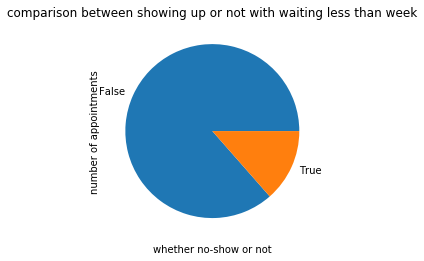

In [80]:
# less than week waiting no_show visualizations
waiting_less_than_week['no_show'].value_counts().plot(kind = 'pie');
plt.xlabel('whether no-show or not');
plt.ylabel('number of appointments');
plt.title('comparison between showing up or not with waiting less than week');

percentage no show of having less than week is 13.5%

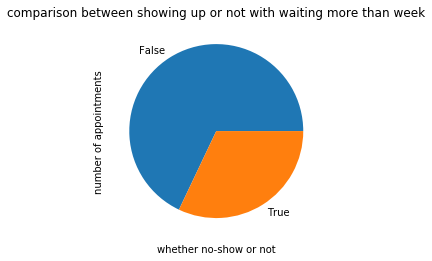

In [79]:
# more than week waiting no_show visualizations
waiting_more_than_week['no_show'].value_counts().plot(kind = 'pie');
plt.xlabel('whether no-show or not');
plt.ylabel('number of appointments');
plt.title('comparison between showing up or not with waiting more than week');

percentage of no_show with more than week is 32%

#### some calculations

In [71]:
num_of_no_show_appointments_on_less_than_week_waiting = waiting_less_than_week.query('no_show == True')['no_show'].count()
num_of_no_show_appointments_on_more_than_week_waiting = waiting_more_than_week.query('no_show == True')['no_show'].count()

In [72]:
percentage_of_no_show_less_than_week = (num_of_no_show_appointments_on_less_than_week_waiting/70752)*100
percentage_of_no_show_less_than_week

13.524706015377658

In [73]:
percentage_of_no_show_more_than_week = (num_of_no_show_appointments_on_more_than_week_waiting/39774)*100
percentage_of_no_show_more_than_week

32.0561170613969

we could say that waiting more than week will affect of no showing the appointments

### Does have a scholarship affect showing up the appointment?

#### new variables that separate the dataframe into have a scholarship or not

In [74]:
has_scholarship = df.query('scholarship == True')
has_not_scholarship = df.query('scholarship == False')

#### some visualizations

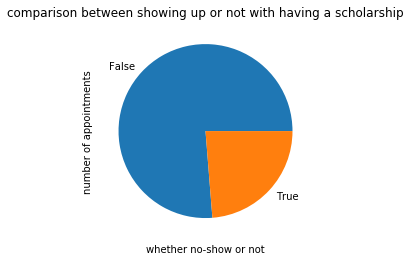

In [76]:
# have a shcolarship no_show visualizations
has_scholarship['no_show'].value_counts().plot(kind = 'pie');
plt.xlabel('whether no-show or not');
plt.ylabel('number of appointments');
plt.title('comparison between showing up or not with having a scholarship');

percantage no show of having a scholarship is 23.7%

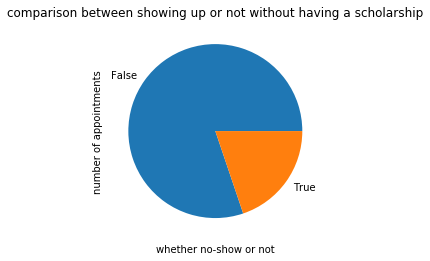

In [78]:
# haven't a shcolarship no_show visualizations
has_not_scholarship['no_show'].value_counts().plot(kind = 'pie');
plt.xlabel('whether no-show or not');
plt.ylabel('number of appointments');
plt.title('comparison between showing up or not without having a scholarship');

percentage of no_show haven't a scholarship is 19.8%

In [81]:
# number of appointments with have a shcolarship
has_scholarship.shape

(10861, 8)

In [82]:
# number of appointments with haven't a shcolarship
has_not_scholarship.shape

(99665, 8)

#### some calculations

In [83]:
num_of_no_show_has_scholarship = has_scholarship.query('no_show == True')['no_show'].count()
num_of_no_show_has_not_scholarship = has_not_scholarship.query('no_show == True')['no_show'].count()

In [84]:
percentage_of_no_show_has_shcolarship = (num_of_no_show_has_scholarship/10861)*100
percentage_of_no_show_has_shcolarship 

23.73630420771568

In [85]:
percentage_of_no_show_has_not_shcolarship = (num_of_no_show_has_not_scholarship/99665)*100
percentage_of_no_show_has_not_shcolarship

19.807354638037424

The difference between two percentages is not big but people having a scholarship no_show more than other 

### Does send SMS-message affect showing up the appointment?

#### new variables that separate the dataframe into have received a message or not

In [86]:
sent = df.query('SMS_received == True')
not_sent = df.query('SMS_received == False')

#### some visualizations

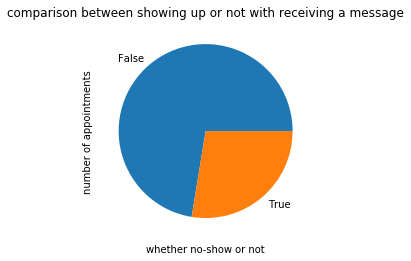

In [88]:
# have received a message no_show visualizations
sent['no_show'].value_counts().plot(kind = 'pie');
plt.xlabel('whether no-show or not');
plt.ylabel('number of appointments');
plt.title('comparison between showing up or not with receiving a message');

percentage no show having receive SMS is 27.5%

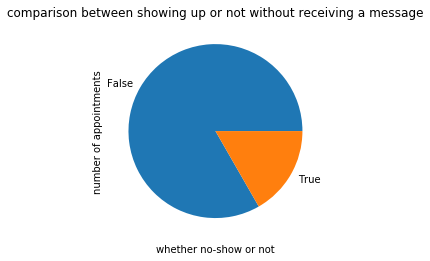

In [89]:
# haven't received a message no_show visualizations
not_sent['no_show'].value_counts().plot(kind = 'pie');
plt.xlabel('whether no-show or not');
plt.ylabel('number of appointments');
plt.title('comparison between showing up or not without receiving a message');

percentage of no_show haven't receive an SMS is 16.7% 

#### some calculations

In [90]:
sent.shape

(35482, 8)

In [91]:
not_sent.shape

(75044, 8)

In [92]:
num_of_no_show_with_sent = sent.query('no_show == True')['no_show'].count()
num_of_no_show_without_sent = not_sent.query('no_show == True')['no_show'].count()

In [93]:
percentage_of_no_show_with_sent = (num_of_no_show_with_sent/35482)*100
percentage_of_no_show_with_sent

27.574544839637

In [94]:
percentage_of_no_show_without_sent = (num_of_no_show_without_sent/75044)*100
percentage_of_no_show_without_sent

16.703533926762965

We could say this is a shock because of people they didn't recieve a message have a less no_show

### Does the age affect showing up the appointment?

#### some statisctics

In [95]:
df['age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

So we will separate the ages older and younger than 37

In [96]:
old = df.query('age >= 37')
not_old = df.query('age < 37')

#### some visualizations

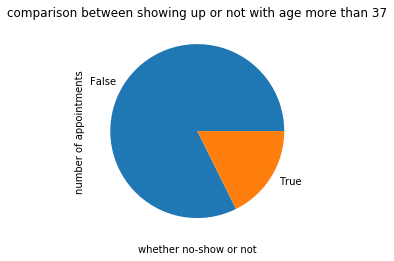

In [97]:
# old people no_show visualizations
old['no_show'].value_counts().plot(kind = 'pie');
plt.xlabel('whether no-show or not');
plt.ylabel('number of appointments');
plt.title('comparison between showing up or not with age more than 37');

percentage no show having age more than 37 is 17.6%

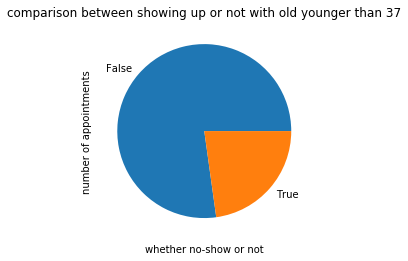

In [98]:
# not old people no_show visualizations
not_old['no_show'].value_counts().plot(kind = 'pie');
plt.xlabel('whether no-show or not');
plt.ylabel('number of appointments');
plt.title('comparison between showing up or not with old younger than 37');

percentage of no_show younger than 37 is 22.8%

#### some calculations

In [99]:
old.shape

(55943, 8)

In [100]:
not_old.shape

(54583, 8)

In [101]:
num_of_no_show_old = old.query('no_show == True')['no_show'].count()
num_of_no_show_not_old = not_old.query('no_show == True')['no_show'].count()

In [102]:
percentage_of_no_show_old = (num_of_no_show_old/55943)*100
percentage_of_no_show_old

17.651895679530952

In [103]:
percentage_of_no_show_not_old = (num_of_no_show_not_old/54583)*100
percentage_of_no_show_not_old

22.798307165234597

We can say that young patients have higher probability to no_show their appointments

### Does have a Handcap affect showing up the appointment?

#### new variables that separate the dataframe into have handicap or not

In [104]:
handicap = df.query('handicap == True')
not_handicap = df.query('handicap == False')

#### some visualizations

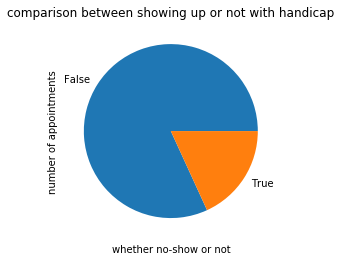

In [105]:
# handicap people no_show visualizations
handicap['no_show'].value_counts().plot(kind = 'pie');
plt.xlabel('whether no-show or not');
plt.ylabel('number of appointments');
plt.title('comparison between showing up or not with handicap');

percentage of no show having handicap is 18.1%

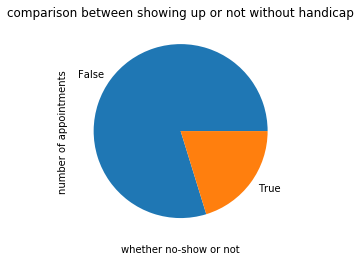

In [106]:
# not handicap people no_show visualizations
not_handicap['no_show'].value_counts().plot(kind = 'pie');
plt.xlabel('whether no-show or not');
plt.ylabel('number of appointments');
plt.title('comparison between showing up or not without handicap');

percentage of no_show haven't handicap is 20.2%

#### some calcualtions

In [107]:
handicap.shape

(2241, 8)

In [108]:
not_handicap.shape

(108285, 8)

In [109]:
num_of_no_show_handicap = handicap.query('no_show == True')['no_show'].count()
num_of_no_show_not_handicap = not_handicap.query('no_show == True')['no_show'].count()

In [110]:
percentage_of_no_show_handicap = (num_of_no_show_handicap/2241)*100
percentage_of_no_show_handicap

18.16153502900491

In [111]:
percentage_of_no_show_not_handicap = (num_of_no_show_not_handicap/108285)*100
percentage_of_no_show_not_handicap

20.23548968001108

People having a handicap have less probability of no_show their appointments

<a id='conclusions'></a>
## Conclusions


>Finally, I could say that the result came after hardwork with facing some limitations like:

<br>I see age in the minus
<br>The data had alot of types such in No_show Yes and No, so I did two conventions to make it easier to calculate
<br>Last thing I want to mention is if the dataset have a column that have time of the appointment

After all these analysis I could show the results

-Does the time betweeen setting up the appointment and appointment day affect showing up the appointment?

Yes, because of percentage no show of having less than week 13.5% and a percentage of more than week is 32%

-Does have a scholarship affect showing up the appointment?

Yes, because of percantage no show of having a scholarship 23.7% and a percentage of haven't is 19.8%

-Does send SMS-message affect showing up the appointment?

Yes, because of percentage no show having receive SMS is 27.5% and a percentage of haven't receive is 16.7% 

-Does the age affect showing up the appointment?

Yes, because of percentage no show having age more than 37 is 17.6% and a percentage of younger is 22.8%

-Does have a Handicap affect showing up the appointment?

Yes, because of percentage no show having handicap is 18.1% and a percentage of haven't handicap is 20.2%